In [1]:
import quaternion
import numpy as np
import shapely
from shapely.geometry import Polygon

/Users/reona/workspace_local/randoor/.venv/lib/python2.7/site-packages/quaternion/numba_wrapper.py:20: UserWarning: 

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Could not import from numba, which means that some
parts of this code may run MUCH more slowly.  You
may wish to install numba.
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

  warnings.warn(warning_text)


In [2]:
from randoor import utils

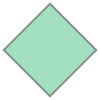

In [3]:
points = utils.get_square_horizon((0,0), 1, np.pi/4)
Polygon(points)

In [4]:
utils.add_dimension(np.arange(9).reshape((3,3)), 0)

array([[0, 1, 2, 0],
       [3, 4, 5, 0],
       [6, 7, 8, 0]])

In [5]:
from randoor.spawner import poly

[[  3.66025404  13.66025404]
 [ 13.66025404  -3.66025404]
 [ -3.66025404 -13.66025404]
 [-13.66025404   3.66025404]]


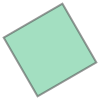

In [6]:
area_points = utils.get_square_horizon((0,0), 10, np.pi/6)
print(area_points)
area_poly = Polygon(area_points)
area_poly

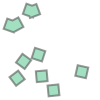

In [7]:
from shapely.ops import unary_union
xy, yaw, polys = poly.sprinkle_cube(area_poly, 10, 2)
mulp = unary_union(polys)
mulp

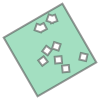

In [8]:
Polygon(area_points, [p.exterior.coords for p in mulp.geoms])

In [9]:
from sklearn.cluster import DBSCAN
eps = 3
points = np.array([p.centroid.coords[0] for p in polys])
db = DBSCAN(eps=eps, min_samples=1).fit(points)
db.labels_

array([0, 1, 2, 0, 3, 4, 5, 6, 7, 6])

In [10]:
from trimesh.convex import hull_points
hull_points(polys[0].exterior.coords)

array([[-0.35350115, 10.49782537],
       [-1.01868472,  8.61168358],
       [ 0.86745707,  7.94650002],
       [ 1.53264063,  9.8326418 ]])

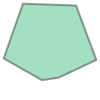

In [11]:
pp = np.array(polys)
hpoints = np.concatenate([p.exterior.coords for p in pp[db.labels_==0]])
hull = hull_points(hpoints)
Polygon(hull)

In [12]:
from trimesh.path.polygons import sample
face_size = 0.001
factor = 1 / face_size
face = Polygon(area_poly.buffer(face_size).exterior.coords, [area_poly.exterior.coords])
sample(face, 2, factor=factor)

array([[12.82655723, -2.21572471],
       [10.31104249,  2.14162873]])

In [13]:
from randoor.spawner import geom
geom.sample_from_faces([area_poly], 5, face_size)

array([[[  6.4488293 ,   8.8310941 ],
        [  7.11418946,   7.67898084],
        [ -9.6701701 ,  -3.25213561],
        [-11.86332786,   4.6979531 ],
        [  5.1012595 ,  11.16562369]]])

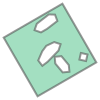

In [14]:
zone_polys, zone_hull = poly.get_clustered_zones(polys, 4)
free_zone = Polygon(area_poly.exterior.coords, [p.exterior.coords for p in zone_hull])
free_zone

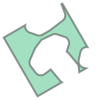

In [15]:
pat = 1.6
keyarea_range = 0.3

path_area = free_zone.buffer(-pat)
path_area

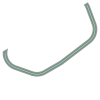

In [25]:
key_area = path_area.intersection(zone_hull[0].buffer(pat+keyarea_range))
key_area

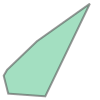

In [17]:
wall = poly.random_triangulation()
wall

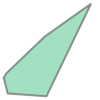

In [18]:
Polygon(wall.exterior.buffer(1).interiors[0])

In [19]:
from randoor.generator import empty_room
generator = empty_room.EmptyRoomGenerator(9, 0.05)
config = generator.generate_new()

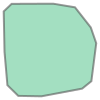

In [20]:
config.get_freespace_poly()

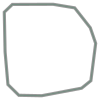

In [21]:
config.get_collision_poly()

[ 0.50711637 -0.22047123]


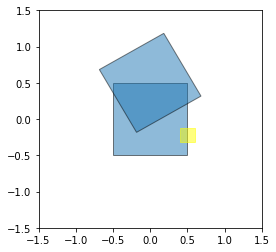

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Polygon
from shapely.affinity import affine_transform
from descartes import PolygonPatch
from randoor import utils

fig = plt.figure(1, figsize=(4,4))
plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)
ax = fig.add_subplot(111)

x = 0
y = 0.5
yaw = np.pi / 6

affine = utils.get_affine(x,y,yaw)

p = Polygon(utils.get_square_horizon((0,0), 0.5))
ax.add_patch(PolygonPatch(p, alpha=0.5, zorder=1))

abcdeoo = [affine[0,0], affine[0,1], affine[1,0], affine[1,1], affine[0,2], affine[1,2]]
pp = affine_transform(p, abcdeoo)
ax.add_patch(PolygonPatch(pp, alpha=0.5, zorder=2))

sample_xy = geom.sample_from_faces([p], face_size=0.01)
print(sample_xy[0][0])
# ss = Polygon(utils.get_square_horizon(sample_xy[0][0], 0.2))
ss = poly.simple_cube(0.2, sample_xy[0][0])
ax.add_patch(PolygonPatch(ss, color='yellow', alpha=0.5, zorder=3))

plt.show()

In [31]:
sum([len(geom.sample_sure(key_area, 2, keyarea_range)) for _ in range(100)])

200